In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1],
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0],
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

In [3]:
def compute_eucledian_distance(x1,x2): 
    return np.sqrt(np.sum((x1-x2)**2))

def k_means(X, k , max_iters , cluster_centers): 
    #Intialization of clusters 
    clusters=[] #this cluster contains all the clusters , which 
    for i in range(k): 
        clusters.append((cluster_centers[i],[]))
    for iter in range(max_iters):
        #Assignment phase  , for each X find the closest cluster 
        for x in X :
            #find the index in clusters where x is currently in 
            ind=-1
            distances = [compute_eucledian_distance(x,cluster[0]) for cluster in clusters]
            closest_cluster_ind= np.argmin(distances)
            clusters[closest_cluster_ind][1].append(x)
        
        #Update phase , for each cluster we need to update the cluster 
        terminate = True
        for i in range(k): 
            old_centroid = clusters[i][0]
            new_centroid = np.mean(clusters[i][1],axis=0)
            distance_between_centroids = compute_eucledian_distance(old_centroid,new_centroid)
            if(distance_between_centroids > 1e-4):
                terminate = False
            clusters[i] = (new_centroid, clusters[i][1]) #updating the cluster with the new centroid 
        if(terminate or iter == max_iters-1):
            break
        #otherwise clear the members of the clusters 
        for i in range(k): 
            clusters[i] = (clusters[i][0],[]) # just retain the centroid and clear the members of the clusters
    return clusters



In [4]:
print("Final centroids are")
intital_centroid = np.array([[3.0, 3.0], [2.0 , 2.0]])
clusters=k_means(X,2,100, intital_centroid)
for cluster in clusters:
    print(cluster[0])
    

Final centroids are
[5.8   2.125]
[ 4.2        -0.05555556]


intial_clusters [(array([5.77058824, 2.01764706]), [array([5.1, 3.5]), array([4.9, 3. ]), array([5.8, 2.7]), array([6., 3.]), array([6.7, 3.1]), array([4.5, 2.3]), array([6.1, 2.8]), array([5.2, 3.2]), array([5.5, 2.6]), array([5., 2.]), array([8. , 0.5]), array([7.5, 0.8]), array([ 8.1, -0.1]), array([2.5, 3.5]), array([6.1, 0.5]), array([5.3, 0.3]), array([5.8, 0.6])]), (array([ 4.0625, -0.1   ]), [array([1., 3.]), array([ 4.5, -1. ]), array([ 3. , -0.5]), array([ 5.1, -0.2]), array([ 6. , -1.5]), array([ 3.5, -0.1]), array([4., 0.]), array([ 5.4, -0.5])])]


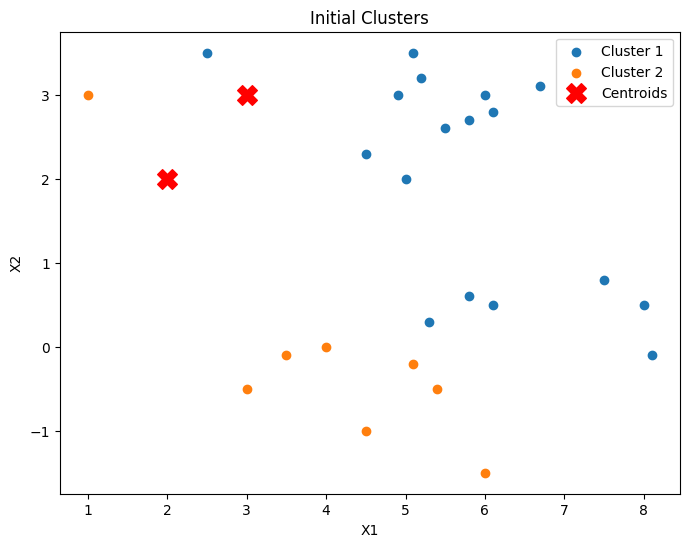

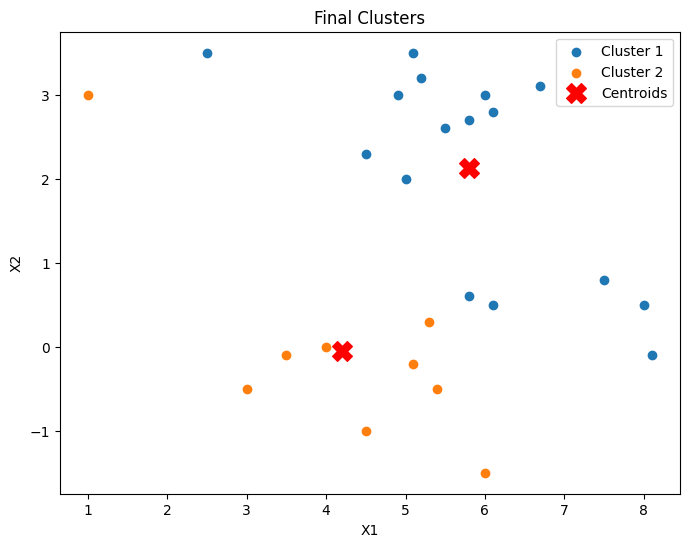

In [5]:
def plot_clusters(clusters, title): 
    #clusters contain tuple of (centroid,points)

    plt.figure(figsize=(8, 6))
    centroids = np.array([cluster[0] for cluster in clusters])
    for cluster in range(len(clusters)):
        x_points = [x[0] for x in clusters[cluster][1]]
        y_points = [y[1] for y in clusters[cluster][1]]
        #print("x_points is ",x_points)
        plt.scatter(x_points, y_points, label=f"Cluster {cluster+1}")
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()
intital_clusters = k_means(X,2,1, intital_centroid)
print("intial_clusters", intital_clusters)
for i in range(2):
    intital_clusters[i] = (intital_centroid[i],intital_clusters[i][1])
plot_clusters(intital_clusters, "Initial Clusters")
plot_clusters(clusters, "Final Clusters")

In [6]:
def compute_sse(clusters):
    sse = 0
    for cluster in clusters:
        centroid = cluster[0]
        for point in cluster[1]:
            sse += compute_eucledian_distance(point, centroid)**2
    return sse

print("SSE for intial centroids  is ", compute_sse(clusters))

SSE for intial centroids  is  83.67222222222222


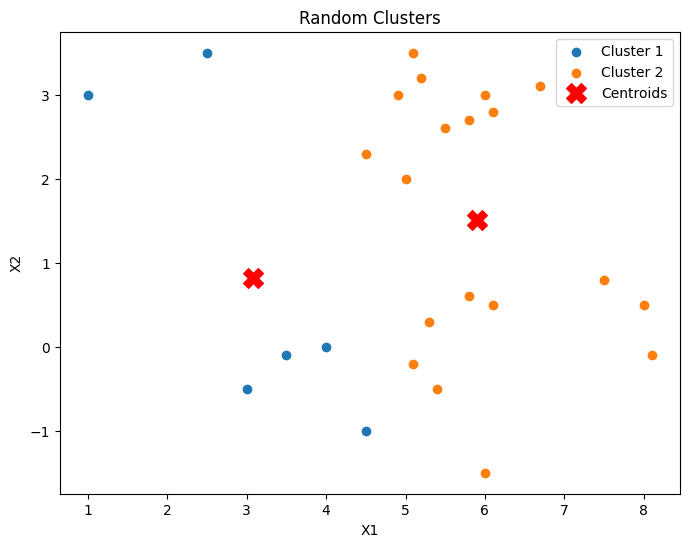

SSE for random cluster is :  87.4661403508772


In [8]:
random_centroids = X[np.random.choice(len(X), 2, replace=False)]
random_clusters = k_means(X,2,100, random_centroids)
plot_clusters(random_clusters, "Random Clusters")
print("SSE for random cluster is : ", compute_sse(random_clusters))


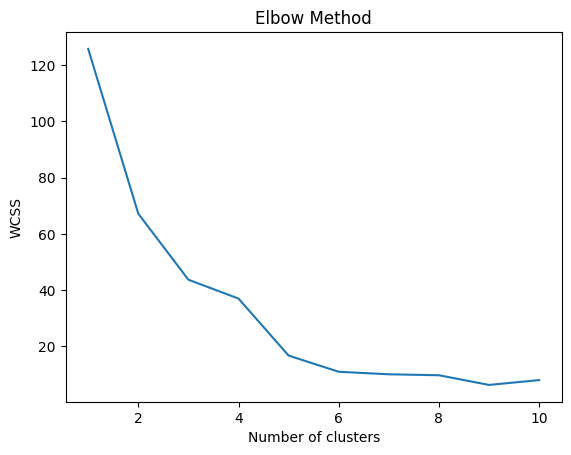

Optimal number of clusters: 8


In [10]:
def find_wcss(k , X, max_iters):
    #basically , we will have one k value recieved as a parametre
    #we will run the k means algorithm for the given k value
    cluster_centre= X[np.random.choice(len(X), k, replace=False)]
    #print(len(cluster_centre[0][1]) + len(cluster_centre[1][1]))
    #print(len(cluster_centre))
    #print(len(X))
    clusters = k_means(X,k,max_iters,cluster_centre)
    #print(len(clusters[0][1]) + len(clusters[1][1]))
    wcss = 0
    #print("k is", k)
    cnt= 0 
    #print("Clusters is", clusters)
    for cluster in clusters:
        for point in cluster[1]:
            cost= compute_eucledian_distance(point,cluster[0])
            #print("cost is", cost)
            cnt= cnt+1
            wcss += compute_eucledian_distance(point,cluster[0])**2
    #print("cnt is ", cnt)
    #print("final is wcss is ", wcss)
    return wcss

wcss_values=[]
k_values = range(1, 11)
for k in range(1, 11): 
    wcss_values.append(find_wcss(k, X, 100))
plt.plot(range(1, 11), wcss_values)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
optimal_k = k_values[np.argmin(np.gradient(np.gradient(wcss_values)))]
print(f"Optimal number of clusters: {optimal_k}")


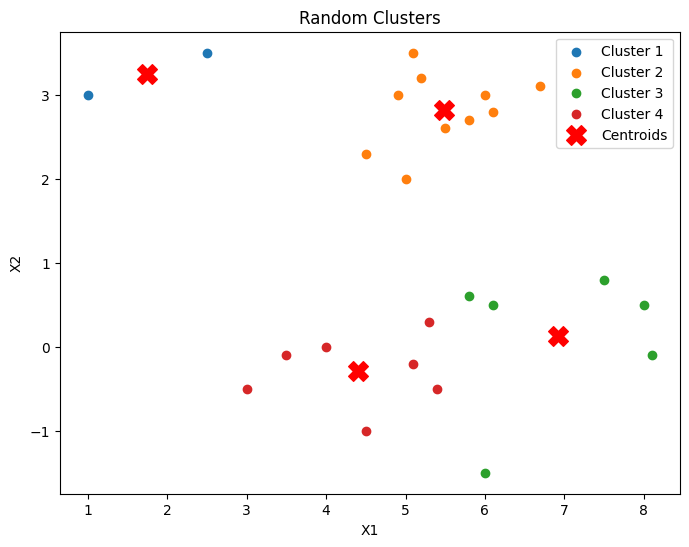

In [11]:
random_centroids = X[np.random.choice(len(X), 4, replace=False)]
random_clusters= k_means(X,4,100, random_centroids)
plot_clusters(random_clusters, "Random Clusters")
